In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [107]:
file = open('../../data/features/2019_05_15_TSLA_y_05_yishuang.pickle','rb')
tsla = pickle.load(file, encoding='utf-8')


In [108]:
tsla = tsla[['Datetime', 'Trading_Hour', 'Volume_perc']]

tsla.columns = ['Datetime', 'Trading_Hour', 'Pt']
tsla.head()

,Datetime,Trading_Hour,Pt
0,2016-05-24 13:30:00+00:00,1,0.261983
1,2016-05-24 14:30:00+00:00,2,0.139856
2,2016-05-24 15:30:00+00:00,3,0.075768
3,2016-05-24 16:30:00+00:00,4,0.075210
4,2016-05-24 17:30:00+00:00,5,0.045838


In [111]:
tsla['Pt-1'] = tsla['Pt'].shift(1)
tsla['Pt-2'] = tsla['Pt'].shift(2)
tsla['Pt-3'] = tsla['Pt'].shift(3)
tsla['Pt-4'] = tsla['Pt'].shift(4)
tsla['Pt-5'] = tsla['Pt'].shift(5)
tsla['Pt-6'] = tsla['Pt'].shift(6)
tsla['Pt-7'] = tsla['Pt'].shift(7)

In [113]:
Trading_Hours = pd.get_dummies(data= tsla['Trading_Hour'], drop_first = True)
tsla = pd.concat([Trading_Hours, tsla], axis = 1)
tsla.rename(columns = {2:'Hour2', 3: 'Hour3', 4: 'Hour4', 5:'Hour5', 6:'Hour6', 7:'Hour7'}, inplace = True)
tsla.drop(['Trading_Hour'], axis = 1, inplace = True)

tsla = tsla.dropna()
tsla.reset_index(inplace=True, drop=True)

In [114]:
tsla.corr()

,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Pt,Pt-1,Pt-2,Pt-3,Pt-4,Pt-5,Pt-6,Pt-7
Hour2,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,2.082169e-03,4.692106e-03,-1.687835e-02,8.778072e-03,8.888880e-04,-9.028841e-04,1.338137e-03,2.081828e-03
Hour3,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,1.338053e-03,2.082270e-03,4.692263e-03,-1.687804e-02,8.778099e-03,8.890131e-04,-9.026515e-04,1.338465e-03
Hour4,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-9.034186e-04,1.338154e-03,2.082427e-03,4.692579e-03,-1.687801e-02,8.778224e-03,8.892457e-04,-9.023242e-04
Hour5,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,8.905006e-04,-9.033179e-04,1.338311e-03,2.082744e-03,4.692607e-03,-1.687789e-02,8.778457e-03,8.895731e-04
Hour6,-0.166667,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,8.778598e-03,8.906013e-04,-9.031607e-04,1.338628e-03,2.082771e-03,4.692732e-03,-1.687765e-02,8.778784e-03
Hour7,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,1.000000,-1.687791e-02,8.778698e-03,8.907585e-04,-9.028443e-04,1.338655e-03,2.082896e-03,4.692964e-03,-1.687733e-02
Pt,0.002082,0.001338,-0.000903,0.000891,0.008779,-0.016878,1.000000e+00,6.745192e-05,-6.584832e-05,-4.137406e-07,-2.515432e-04,-8.490513e-05,-9.669110e-05,-4.345820e-05
Pt-1,0.004692,0.002082,0.001338,-0.000903,0.000891,0.008779,6.745192e-05,1.000000e+00,6.744999e-05,-6.585135e-05,-4.142882e-07,-2.515447e-04,-8.490840e-05,-9.669666e-05
Pt-2,-0.016878,0.004692,0.002082,0.001338,-0.000903,0.000891,-6.584832e-05,6.744999e-05,1.000000e+00,6.744734e-05,-6.585203e-05,-4.158174e-07,-2.515483e-04,-8.491493e-05
Pt-3,0.008778,-0.016878,0.004693,0.002083,0.001339,-0.000903,-4.137406e-07,-6.585135e-05,6.744734e-05,1.000000e+00,6.744621e-05,-6.585406e-05,-4.210764e-07,-2.515587e-04


In [74]:
tsla.head()

,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Datetime,Pt,Pt-1,Pt-2,Pt-3,Pt-4,Pt-5,Pt-6,Pt-7
0,0,0,0,0,0,0,2016-05-25 13:30:00+00:00,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983
1,1,0,0,0,0,0,2016-05-25 14:30:00+00:00,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856
2,0,1,0,0,0,0,2016-05-25 15:30:00+00:00,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768
3,0,0,1,0,0,0,2016-05-25 16:30:00+00:00,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210
4,0,0,0,1,0,0,2016-05-25 17:30:00+00:00,0.143450,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838


In [115]:
from sklearn.linear_model import LinearRegression

# split dataset
length = tsla['Pt'].count()
train = tsla.iloc[:int(length*0.8)]
test = tsla.iloc[int(length*0.8):]

X_train = train[['Pt-1', 'Pt-2', 'Pt-3', 'Pt-4', 'Pt-5', 'Pt-6',
                 'Hour2', 'Hour3', 'Hour4', 'Hour5', 'Hour6', 'Hour7']]

Y_train = train['Pt']

X_test = test[['Pt-1', 'Pt-2', 'Pt-3', 'Pt-4', 'Pt-5', 'Pt-6',
               'Hour2', 'Hour3', 'Hour4', 'Hour5', 'Hour6', 'Hour7']]

Y_test = test['Pt']

linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

print("Linear Reg R^2 training is: {}".format(linear_reg.score(X_train, Y_train)))
print("Linear Reg R^2 training is: {}".format(linear_reg.score(X_test, Y_test)))

print("Linear Reg Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, linear_reg.predict(X_train)))))
print("Linear Reg Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, linear_reg.predict(X_test)))))

Linear Reg R^2 training is: 0.00041218747277715906
Linear Reg R^2 training is: -28.767736860694214
Linear Reg Train RMSE is: 24.611011693229575
Linear Reg Test RMSE is: 0.5047024883309088


In [116]:
import statsmodels.api as sm

model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Pt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1308
Date:                Thu, 16 May 2019   Prob (F-statistic):               1.00
Time:                        05:31:26   Log-Likelihood:                -18558.
No. Observations:                4015   AIC:                         3.714e+04
Df Residuals:                    4003   BIC:                         3.722e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pt-1           0.0002      0.016      0.012      0.990      -0.031       0.031
Pt-2       -7.941e-06      0.016     -0.001      1.000      -0.031       0.031
Pt-3       -2.128e-05      0.016     -0.001      0.999      -0.031       0.031
Pt-4          -0.0003      0.016     -0.018      0.986      -0.031       0.031
Pt-5       -6.264e-05      0.016     -0.004      0.997      -0.031       0.031
Pt-6           0.0001      0.016      0.008      0.994      -0.031       0.031
Hour2          0.1630      1.029      0.158      0.874      -1.854       2.180
Hour3          0.1217      1.029      0.118      0.906      -1.896       2.139
Hour4         -0.0224      1.029     -0.022      0.983      -2.040       1.995
Hour5          0.0990      1.030      0.096      0.923      -1.920       2.118
Hour6          0.6293      1.030      0.611      0.541      -1.390       2.648
Hour7         -1.1030      1.030     -1.071      0.284      -3.122       0.916
==============================================================================
Omnibus:                     7775.263   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        444149600.629
Skew:                          13.616   Prob(JB):                         0.00
Kurtosis:                    1632.172   Cond. No.                         65.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
X_test

,Pt-1,Pt-2,Pt-3,Pt-4,Pt-5,Pt-6,Pt-7,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7
4015,0.142287,0.140044,0.139454,0.401463,0.157133,0.090882,0.099679,0,0,0,1,0,0
4016,0.158271,0.142287,0.140044,0.139454,0.401463,0.157133,0.090882,0,0,0,0,1,0
4017,0.086164,0.158271,0.142287,0.140044,0.139454,0.401463,0.157133,0,0,0,0,0,1
4018,0.106675,0.086164,0.158271,0.142287,0.140044,0.139454,0.401463,0,0,0,0,0,0
4019,0.330029,0.106675,0.086164,0.158271,0.142287,0.140044,0.139454,1,0,0,0,0,0
4020,0.172945,0.330029,0.106675,0.086164,0.158271,0.142287,0.140044,0,1,0,0,0,0
4021,0.078026,0.172945,0.330029,0.106675,0.086164,0.158271,0.142287,0,0,1,0,0,0
4022,0.070142,0.078026,0.172945,0.330029,0.106675,0.086164,0.158271,0,0,0,1,0,0
4023,0.075084,0.070142,0.078026,0.172945,0.330029,0.106675,0.086164,0,0,0,0,1,0
4024,0.077804,0.075084,0.070142,0.078026,0.172945,0.330029,0.106675,0,0,0,0,0,1


In [76]:
# split dataset
length = tsla['Pt'].count()
train = list(tsla['Pt'].iloc[:int(length*0.8)])
test = list(tsla['Pt'].iloc[int(length*0.8):])

In [78]:
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)


Lag: 30
Coefficients: [ 3.90602278e-02  7.13889720e-05  4.77625367e-02 -1.19972587e-04
 -1.01172912e-02 -4.41587361e-05  8.55972986e-04 -2.11111347e-04
 -1.29625362e-04  1.43295627e-03 -1.81168932e-05 -1.21961488e-02
 -5.02788900e-04  1.43092824e-01 -2.03455335e-04 -3.27753775e-01
 -2.20207955e-04  4.00477236e-02 -1.97150239e-04 -3.55012877e-03
 -3.63202901e-05  2.62637963e-04 -4.89017156e-04 -6.78368150e-05
  2.89399048e-03  1.72745388e-04 -3.49024125e-02  2.00824818e-04
 -2.41421404e-01 -2.74215054e-04 -1.01524137e-01]


In [79]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=-0.004004, expected=0.158271
predicted=-0.005922, expected=0.086164
predicted=-0.001602, expected=0.106675
predicted=-0.063170, expected=0.330029
predicted=-0.073019, expected=0.172945
predicted=-0.068149, expected=0.078026
predicted=-0.025353, expected=0.070142
predicted=-0.027407, expected=0.075084
predicted=-0.018093, expected=0.077804
predicted=0.024122, expected=0.104815
predicted=-0.077943, expected=0.336285
predicted=-0.114276, expected=0.142326
predicted=-0.037559, expected=0.186111
predicted=-0.036905, expected=0.119959
predicted=-0.036556, expected=0.066537
predicted=-0.002626, expected=0.076008
predicted=-0.005555, expected=0.076547
predicted=-0.049349, expected=0.680151
predicted=0.004548, expected=0.186305
predicted=0.003091, expected=0.115685
predicted=0.020945, expected=0.096013
predicted=0.003979, expected=0.090555
predicted=0.007782, expected=0.058818
predicted=-0.018750, expected=0.063148
predicted=-0.096441, expected=0.284778
predicted=0.003469, expected=0.

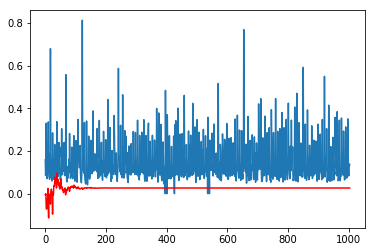

In [80]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()